<a href="https://colab.research.google.com/github/safranco8/diplodatos-pdi/blob/main/TP_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

In [3]:
def yiq_from_rgb(arr):
    m = np.array([[0.299,      0.587,        0.114],
                 [0.59590059, -0.27455667, -0.32134392],
                 [0.21153661, -0.52273617, 0.31119955]])
    return np.dot(arr, m.T.copy())

In [4]:
def rgb_from_yiq(arr):
    m = np.array([[1, 0.9663, 0.6210],
                 [1, -0.2721, -0.6474],
                 [1, -1.1070, 1.7046]])
    return np.clip(np.dot(arr, m.T.copy()),0.0,1.0)

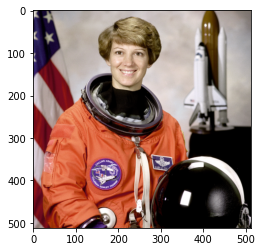

In [5]:
#Cargar la imagen
img_rgb = imageio.imread('imageio:astronaut.png') / 255


#Mostrar la imagen
plt.imshow(img_rgb)

In [6]:
def apply_square(yiq_image):
    return yiq_image[:,:,0]**2
    
def apply_root(yiq_image):
    return np.sqrt(yiq_image[:,:,0])

def linear_filter(x,min_limit,max_limit):
    for y in range(x.shape[0]):
        if x[y] <= min_limit:
            x[y] = 0
        elif(x[y]>=max_limit):
            x[y] = 1
        else:
            x[y] = (x[y]-min_limit)/(max_limit-min_limit)
    return x

def apply_lineal(yiq_image, slider_min, slider_max):
    if(slider_min == slider_max):
        print("El limite inferior debe ser menor al superior")
    else:    
        orig_y = yiq_image[:,:,0]
        modif_y = linear_filter(yiq_image[:,:,0].reshape(-1),slider_min,slider_max)
        return modif_y.reshape(orig_y.shape[0],-1)

Button(description='Filtro cuadrado', style=ButtonStyle())

Output()

Button(description='Filtro raíz', style=ButtonStyle())

Output()

FloatRangeSlider(value=(0.2, 0.8), description='Rango filtro lineal:', max=1.0, readout_format='.1f', step=0.0…

Button(description='Filtro lineal a trozos', style=ButtonStyle())

Output()

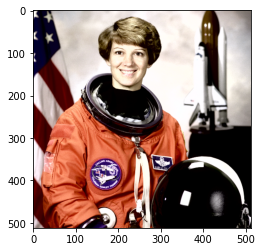

In [19]:
button = widgets.Button(description="Filtro cuadrado")
button2 = widgets.Button(description="Filtro raíz")
button3 = widgets.Button(description="Filtro lineal a trozos")
output = widgets.Output()
yiq_image = yiq_from_rgb(img_rgb)    

def on_button_clicked(b):
    yiq_image = yiq_from_rgb(img_rgb)
    res=yiq_image.copy()
    yiq_res = apply_square(yiq_image)
    res[:,:,0] = yiq_res
    plt.imshow(rgb_from_yiq(res))

def on_button2_clicked(b):
    yiq_image = yiq_from_rgb(img_rgb)
    res=yiq_image.copy()
    yiq_res = apply_root(yiq_image)
    res[:,:,0] = yiq_res
    plt.imshow(rgb_from_yiq(res))
    
def on_button3_clicked(b):
    yiq_image = yiq_from_rgb(img_rgb)
    res=yiq_image.copy()
    yiq_res = apply_lineal(yiq_image,slider.value[0],slider.value[1])
    res[:,:,0] = yiq_res
    plt.imshow(rgb_from_yiq(res))
    
button.on_click(on_button_clicked)
button2.on_click(on_button2_clicked)
button3.on_click(on_button3_clicked)

display(button, output)
display(button2, output)

slider = widgets.FloatRangeSlider(
    value=[0.2, 0.8],
    min=0,
    max=1,
    step=0.01,
    description='Rango filtro lineal:',
    readout=True,
    readout_format='.1f',
)
display(slider)
display(button3, output)

FloatSlider(value=1.0, description='Saturacion:', max=2.0, readout_format='.1f')

Button(description='Cambiar saturacion', style=ButtonStyle())

Output()

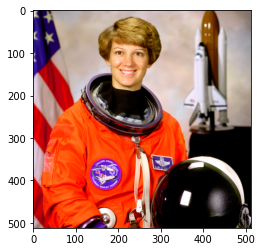

In [20]:
slider_sat = widgets.FloatSlider(
    value=1.0,
    min=0.0,
    max=2.0,
    step=0.1,
    description='Saturacion:',
    readout_format='.1f',
)

def bot_saturacion_clicked(b):
    beta = slider_sat.value
    yiq_image = yiq_from_rgb(img_rgb)
    yiq_image[:,:,1] = beta*(yiq_image[:,:,1])
    yiq_image[:,:,2] = beta*(yiq_image[:,:,2])
    plt.imshow(rgb_from_yiq(yiq_image))
    
bot_saturacion = widgets.Button(description="Cambiar saturacion")
bot_saturacion.on_click(bot_saturacion_clicked)

display(slider_sat)
display(bot_saturacion, output)

In [14]:
barlett = np.array([ [1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]]) / 16 

gaussiano3 = barlett

gaussiano5 = np.array([[1, 4,  6,  4,  1],
                      [4, 16, 24, 16, 4],
                      [6, 24, 36, 24, 6],
                      [4, 16, 24, 16, 4],
                      [1, 4,  6,  4,  1]]) / 256

laplaciano = np.array([[ 0, -1,  0],
                       [-1,  4, -1],
                       [ 0, -1,  0]])

sobel_oeste = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

sobel_este = np.array([[1,  0, -1],
                       [2,  0, -2],
                       [1,  0, -1]])

sobel_sur = np.array([[ 1,  2,  1],
                      [ 0,  0,  0],
                      [-1, -2, -1]])

sobel_norte = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

dog = gaussiano5 - np.pad(gaussiano3, pad_width=1)

kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), dtype="float") * (1.0 / (kernel_size * kernel_size))


def convolucion(img, kernel):
    # offset para calcular el padding necesario
    offset = (kernel.shape[0]-1)//2
    # padding para repetir los bordes según el tamaño del kernel
    img_pad = np.pad(img, ((offset, offset),(offset, offset)), mode = 'edge')

    w, h = img.shape

    res = np.zeros(img.shape)
    for i in range(offset, w - offset):
        for j in range(offset, h - offset):
            
            region = img_pad[i-offset:i+offset+1, j-offset:j+offset+1]
            conv = np.sum(region * kernel)
            res[i-offset, j-offset] = conv

    return res

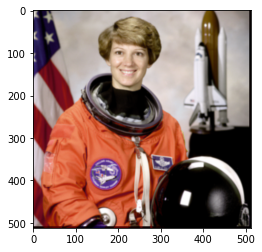

In [17]:
# Paso la imagen a yiq y tomo el canal y
yiq_image = yiq_from_rgb(img_rgb)
y_channel = yiq_image[:,:,0]

# Defino el kernel, puede ser:
# barlett, gaussiano3, gaussiano5, laplaciano, sobel_norte, sobel_sur, sobel_este, sobel_oeste, dog
# Para dog hay que multiplicar por un escalar, no tengo claro si está bien o hay un error en el cálculo
# kernel = barlett
# kernel = gaussiano3
kernel = gaussiano5
# kernel = laplaciano
# kernel = sobel_norte
# kernel = sobel_sur
# kernel = sobel_este
# kernel = sobel_oeste
# kernel = dog
y_res = convolucion(y_channel,kernel) # * 100 # para dog

yiq_image[:,:,0] = y_res

rgb_res = rgb_from_yiq(yiq_image)
plt.imshow(rgb_res)

In [16]:
# k = tamaño del elemento estructurante
def erosion(img,k=3):
    
    m,n= img.shape 
    centro = (k-1)//2
    #Define new image
    res = np.zeros(img.shape)
    #Erosion without using inbuilt cv2 function for morphology
    for i in range(centro, m-centro):
        for j in range(centro,n-centro):
            res[i,j]= np.min(img[i-centro:i+centro, j-centro:j+centro])
    return res

# k = tamaño del elemento estructurante
def dilatacion(img,k=3):
    
    m,n= img.shape 
    centro = (k-1)//2
    
    res = np.zeros(img.shape)
    
    for i in range(centro, m-centro):
        for j in range(centro,n-centro):
            res[i,j]= np.max(img[i-centro:i+centro, j-centro:j+centro])
    return res

# k = tamaño del elemento estructurante
def mediana(img,k=3):
    
    m,n= img.shape 
    centro = (k-1)//2
    
    res = np.zeros(img.shape)
    
    for i in range(centro, m-centro):
        for j in range(centro,n-centro):
            res[i,j]= np.median(img[i-centro:i+centro, j-centro:j+centro])
    return res

def resta(img,img2):
    return (img - img2 + 1.0) / 2.0

def apertura(img,k):
    res = erosion(img,k)
    res = dilatacion(res,k)
    return res

def cierre(img,k):
    res = dilatacion(img,k)
    res = erosion(res,k)
    return res

def borde_ext(img,k):
    return resta(dilatacion(img,k), img)

def borde_int(img,k):
    return resta(img, erosion(img,k))

def gradiente(img,k):
    return resta(dilatacion(img,k), erosion(img,k))

def top_hat(img,k):
    return resta(img, apertura(img,k))

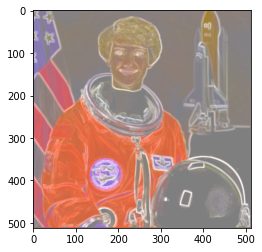

In [18]:
# Paso la imagen a yiq y tomo el canal y
yiq_image = yiq_from_rgb(img_rgb)
y_channel = yiq_image[:,:,0]

# tamaño del elemento estructurante
k = 5
# y_res = erosion(y_channel,k)
# y_res = dilatacion(y_channel,k)
# y_res = apertura(y_channel,k)
# y_res = cierre(y_channel,k)
# y_res = borde_ext(y_channel,k)
# y_res = borde_int(y_channel,k)
y_res = gradiente(y_channel,k)
# y_res = top_hat(y_channel,k)
# y_res = mediana(y_channel,k)

yiq_image[:,:,0] = y_res

rgb_res = rgb_from_yiq(yiq_image)
plt.imshow(rgb_res)